## Credit EDA Assignment

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

In [3]:
application = pd.read_csv('application_data.csv')
prev_application = pd.read_csv('previous_application.csv')

In [4]:
#checking few from dataframe
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

In [5]:
# checking structure of the data for application
application.shape

(307511, 122)

In [6]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
# checking summary for numerical variable
application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,...,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,...,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,...,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192

In [8]:
#checking data types
application.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [9]:
# checking structure of the data for prev_application
prev_application.shape

(1670214, 37)

In [10]:
prev_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [11]:
prev_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


#### Data Quality Check and Missing values

In [12]:
# check for null value
application.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [13]:
application.isnull().mean().sort_values(ascending = False)

COMMONAREA_MEDI             0.698723
COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
NONLIVINGAPARTMENTS_MODE    0.694330
NONLIVINGAPARTMENTS_AVG     0.694330
                              ...   
NAME_HOUSING_TYPE           0.000000
NAME_FAMILY_STATUS          0.000000
NAME_EDUCATION_TYPE         0.000000
NAME_INCOME_TYPE            0.000000
SK_ID_CURR                  0.000000
Length: 122, dtype: float64

In [14]:
##Finding the percentage of missing values in all columns
round(application.isnull().mean()*100,2).sort_values(ascending = False) 

COMMONAREA_MEDI             69.87
COMMONAREA_AVG              69.87
COMMONAREA_MODE             69.87
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAPARTMENTS_AVG     69.43
                            ...  
NAME_FAMILY_STATUS           0.00
NAME_EDUCATION_TYPE          0.00
NAME_INCOME_TYPE             0.00
AMT_ANNUITY                  0.00
SK_ID_CURR                   0.00
Length: 122, dtype: float64

In [15]:
# after consifering 50% as thereshold value, deleting these columns
application.loc[:,application.isnull().mean()<=0.5]
application=application.loc[:,application.isnull().mean()<=0.5]

In [16]:
#shape of application.shape
application.shape

(307511, 81)

**For columns which has less percentage(around 13% or so), you need to check what will be
the best metric to impute the missing values? Like if the column you are checking is a
categorical column check, which category you can use to fill the nulls. For others check does
mean or median can be imputed or not. Others cases may be imputing with 0. You need to
do this task for some variables and not for all, say 5.**

In [17]:
# columns that has null any null values
app =  application.columns[application.isnull().any()]

application[app].isnull().sum()*100/ len(application)


AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
OCCUPATION_TYPE                 31.345545
CNT_FAM_MEMBERS                  0.000650
EXT_SOURCE_2                     0.214626
EXT_SOURCE_3                    19.825307
YEARS_BEGINEXPLUATATION_AVG     48.781019
FLOORSMAX_AVG                   49.760822
YEARS_BEGINEXPLUATATION_MODE    48.781019
FLOORSMAX_MODE                  49.760822
YEARS_BEGINEXPLUATATION_MEDI    48.781019
FLOORSMAX_MEDI                  49.760822
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
DAYS_LAST_PHONE_CHANGE           0.000325
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13

**here we can see that the columns whicha has below 13% missing value is--  AMT_ANNUITY , AMT_GOODS_PRICE,NAME_TYPE_SUITE ,CNT_FAM_MEMBERS ,EXT_SOURCE_2 ,OBS_30_CNT_SOCIAL_CIRCLE ,DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE  ,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
**

**AMT_ANNUITY** 

In [18]:
application.AMT_ANNUITY.value_counts()

9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

In [19]:
application.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

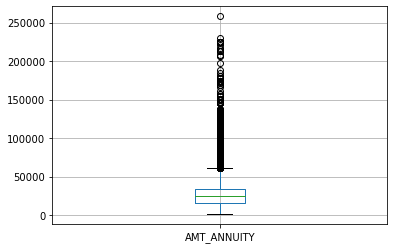

In [20]:
# it is a continous variable so checking for outliers
application.boxplot(column=['AMT_ANNUITY'])
plt.show()

In [21]:
# since it has lot of outlier so taking median value to impute null value
application.AMT_ANNUITY.median()

24903.0

**AMT_GOODS_PRICE**

In [22]:
application.AMT_GOODS_PRICE.head()

0     351000.0
1    1129500.0
2     135000.0
3     297000.0
4     513000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [23]:
application.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

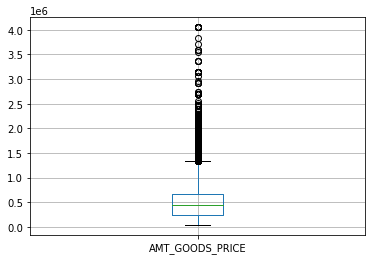

In [24]:
# it is a continous variable so checking for outliers
application.boxplot(column=['AMT_GOODS_PRICE'])
plt.show()

In [25]:
# since it has lot of outlier so taking median value to impute null value
application.AMT_GOODS_PRICE.median()

450000.0

**NAME_TYPE_SUITE**

In [26]:
application.NAME_TYPE_SUITE.head()

0    Unaccompanied
1           Family
2    Unaccompanied
3    Unaccompanied
4    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [27]:
application.NAME_TYPE_SUITE.describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [28]:
# it is a categorical value  so imputing null with mode value 
application.NAME_TYPE_SUITE.mode()

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

#### so the value to be imputed is unaccompanied

**CNT_FAM_MEMBERS**

In [29]:
# checking details for CNT_FAM_MEMBERS column
application.CNT_FAM_MEMBERS.head()

0    1.0
1    2.0
2    1.0
3    2.0
4    1.0
Name: CNT_FAM_MEMBERS, dtype: float64

In [30]:
application.CNT_FAM_MEMBERS.describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

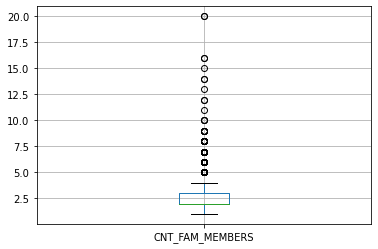

In [31]:
#plotting boxplot for finding oulier
application.boxplot(column=['CNT_FAM_MEMBERS'])
plt.show()

In [32]:
# since it has lot of outlier so taking median value to impute null value
application.CNT_FAM_MEMBERS.median()

2.0

*** so the value to be imputed is 2.0***

#### EXT_SOURCE_2

In [33]:
#checking details for EXT_SOURCE_2 column
application.EXT_SOURCE_2.head()

0    0.262949
1    0.622246
2    0.555912
3    0.650442
4    0.322738
Name: EXT_SOURCE_2, dtype: float64

In [34]:
application.EXT_SOURCE_2.describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

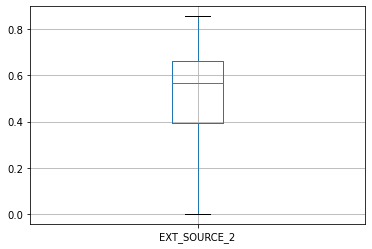

In [35]:
# plotting box plot
application.boxplot(column=['EXT_SOURCE_2'])
plt.show()

In [36]:
# since it has lot of outlier so taking median value to impute null value
application.EXT_SOURCE_2.median()

0.5659614260608526

**so the value to be imputed is 0.5659614260608526**

In [37]:
### Checking datatype of all columns
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

### Dealing with incorrect values

**Checking for CODE_GENDER column**

In [38]:
application['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

**since gender code cannot be XNA  so imputing that with F  because in data given F is almost double than M**

In [39]:
application['CODE_GENDER'] = application['CODE_GENDER'].apply(lambda x:'F' if x =='XNA' else x)

In [40]:
application['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

**Hence the XNA got replaced**

### Dealing with NAME_FAMILY_STATUS column

In [41]:
application['NAME_FAMILY_STATUS'].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

**Here Unknown is missing data which may be not provided so dealing with it**

#### since Married count is more so imputing Unknown with Married

In [42]:
application['NAME_FAMILY_STATUS'] = application['NAME_FAMILY_STATUS'].apply(lambda x:'Married' if x=='Unknown' else x)

In [43]:
application['NAME_FAMILY_STATUS'].value_counts()

Married                 196434
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: NAME_FAMILY_STATUS, dtype: int64

**Hence unknown got imputed with Married**

In [44]:
# checking for float datatype and converting them to int64
df =application.select_dtypes(include='float64').columns
df

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG',
       'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [45]:
application[df]=application[df].apply(lambda col: col.astype('int',errors='ignore'))


In [46]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500,406597,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0,-9461,-637,-3648,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000,1293502,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0,-16765,-1188,-1186,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500,135000,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0,-19046,-225,-4260,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000,312682,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0,-19005,-3039,-9833,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500,513000,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0,-19932,-3038,-4311,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


**For numerical columns check for outliers and report them for at-least 5 variables. Add
observations and reasoning.**

### 1. AMT_CREDIT

In [47]:
application.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

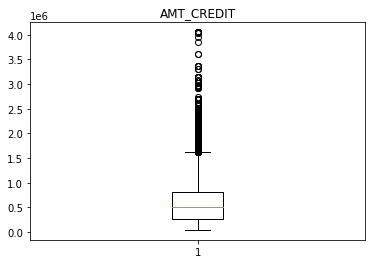

In [48]:
# boxplot for AMT_CREDIT
plt.boxplot(application['AMT_CREDIT'])
plt.title('AMT_CREDIT')
plt.show()



In [49]:
# we can conclude that there exists the value which are above the whisker i.e, maximum are considered as outliers, hence
Q1 = application['AMT_CREDIT'].quantile(0.25)
Q3 = application['AMT_CREDIT'].quantile(0.75) 
IQR = Q3 - Q1

upperwhisker= (Q3 + 1.5 * IQR)
lowerwhisker= (Q1 - 1.5 * IQR)


In [50]:
print("lowerwhisker:{}".format(lowerwhisker))

lowerwhisker:-537975.0


In [51]:
print("upperwhisker:{}".format(upperwhisker))

upperwhisker:1616625.0


**Hence the AMT_CREDIT greater than 1616625.0 is considered as outlier**

### 2. CNT_CHILDREN

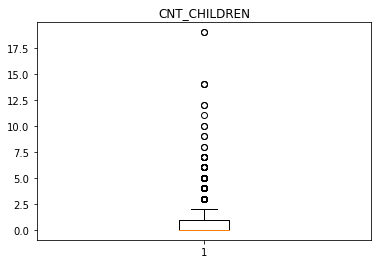

In [52]:
# boxplot for CNT_CHILDREN
plt.boxplot(application['CNT_CHILDREN'])
plt.title('CNT_CHILDREN')
plt.show()



In [53]:
# we can conclude that there exists the value which are above the whisker i.e, maximum are considered as outliers, hence
Q1 = application['CNT_CHILDREN'].quantile(0.25)
Q3 = application['CNT_CHILDREN'].quantile(0.75) 
IQR = Q3 - Q1

upperwhisker= (Q3 + 1.5 * IQR)
lowerwhisker= (Q1 - 1.5 * IQR)

In [54]:
print("lowerwhisker:{}".format(lowerwhisker))

lowerwhisker:-1.5


In [55]:
print("upperwhisker:{}".format(upperwhisker))

upperwhisker:2.5


**Hence the CNT_CHILDREN greater than 3 is considered as outlier since count of childern cant be in decimal format**

### 3. AMT_ANNUITY

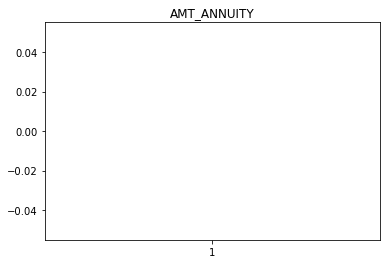

In [56]:
# boxplot for AMT_ANNUITY
plt.boxplot(application['AMT_ANNUITY'])
plt.title('AMT_ANNUITY')
plt.show()

In [57]:
# we can conclude that there exists the value which are above the upper whisker i.e, maximum are considered as outliers, hence
Q1 = application['FLOORSMAX_MEDI'].quantile(0.25)
Q3 = application['FLOORSMAX_MEDI'].quantile(0.75) 
IQR = Q3 - Q1

upperwhisker= (Q3 + 1.5 * IQR)
lowerwhisker= (Q1 - 1.5 * IQR)

In [58]:
print("lowerwhisker:{}".format(lowerwhisker))

lowerwhisker:-0.08320000000000002


In [59]:
print("upperwhisker:{}".format(upperwhisker))

upperwhisker:0.5831999999999999


**Hence the AMT_ANNUITY greater than 61704.0 is considered as outlier**

In [60]:
### 4. AMT_GOODS_PRICE

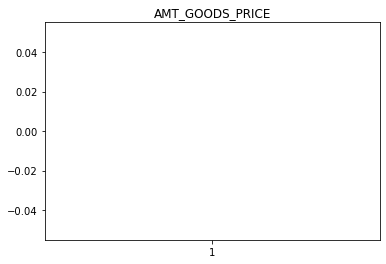

In [61]:
# boxplot for AMT_GOODS_PRICE
plt.boxplot(application['AMT_GOODS_PRICE'])
plt.title('AMT_GOODS_PRICE')
plt.show()

In [62]:
# we can conclude that there exists the value which are above the upper whisker i.e, maximum are considered as outliers, hence
Q1 = application['AMT_GOODS_PRICE'].quantile(0.25)
Q3 = application['AMT_GOODS_PRICE'].quantile(0.75) 
IQR = Q3 - Q1

upperwhisker= (Q3 + 1.5 * IQR)
lowerwhisker= (Q1 - 1.5 * IQR)

In [63]:
print("lowerwhisker:{}".format(lowerwhisker))

lowerwhisker:-423000.0


In [64]:
print("upperwhisker:{}".format(upperwhisker))

upperwhisker:1341000.0


**Hence the AMT_GOODS_PRICE greater than 1341000.0 is considered as outlier**

### 5. AMT_INCOME_TOTAL

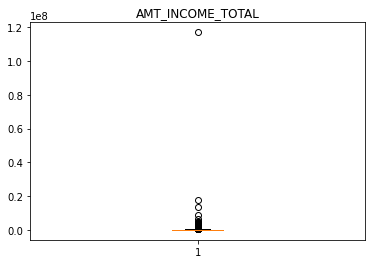

In [65]:
# boxplot for AMT_INCOME_TOTAL
plt.boxplot(application['AMT_INCOME_TOTAL'])
plt.title('AMT_INCOME_TOTAL')
plt.show()

In [66]:
# we can conclude that there exists the value which are above the upper whisker i.e, maximum are considered as outliers, hence
Q1 = application['AMT_INCOME_TOTAL'].quantile(0.25)
Q3 = application['AMT_INCOME_TOTAL'].quantile(0.75) 
IQR = Q3 - Q1

upperwhisker= (Q3 + 1.5 * IQR)
lowerwhisker= (Q1 - 1.5 * IQR)

In [67]:
print("lowerwhisker:{}".format(lowerwhisker))

lowerwhisker:-22500.0


In [68]:
print("upperwhisker:{}".format(upperwhisker))

upperwhisker:337500.0


**Hence the AMT_INCOME_TOTAL greater than 61704.0 is considered as outlier**

## *Binning of continuous variables.

In [69]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500,406597,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0,-9461,-637,-3648,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000,1293502,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0,-16765,-1188,-1186,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500,135000,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0,-19046,-225,-4260,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000,312682,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0,-19005,-3039,-9833,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500,513000,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0,-19932,-3038,-4311,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


**AMT_CREDIT**

In [70]:
#Bining the continous variable
q1= application['AMT_CREDIT'].quantile(0.25)
q2= application['AMT_CREDIT'].quantile(0.50)
q3= application['AMT_CREDIT'].quantile(0.75)
max_value= application['AMT_CREDIT'].max()

In [71]:
# cut is used  when you need to segment and sort data values into bins.
application['AMT_CREDIT'] = pd.cut(application['AMT_CREDIT'] ,[q1,q2,q3,max], labels=['Low','Median','High'])
application['AMT_CREDIT'].value_counts()

TypeError: float() argument must be a string or a number, not 'builtin_function_or_method'

## Analysis

In [ ]:
application.head()


In [ ]:
#Check the Imbalance percentage.
app= 100*application.TARGET.value_counts()/ len(application)
app.plot.bar()
plt.xticks(rotation=90)
plt.show()
application['TARGET'].value_counts()

In [ ]:
application['TARGET'].value_counts()

** In application there are 282686 non defaulter and 24825 are defaulter**

In [72]:
# This is not balanced data set. Divide the data into two sets, i.e. Target=1and Target=0.
application_0 =  application[application['TARGET']==0]
application_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000,1293502,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0,-16765,-1188,-1186,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500,135000,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0,-19046,-225,-4260,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000,312682,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0,-19005,-3039,-9833,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500,513000,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0,-19932,-3038,-4311,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000,490495,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0,-16941,-1588,-4970,-477,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0


In [73]:
application_0.shape

(282686, 81)

In [74]:
application_1 =  application[application['TARGET']==1]
application_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500,406597,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0,-9461,-637,-3648,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500,979992,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0,-18724,-2628,-6573,-1827,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,0.9732,0.0417,0.9732,0.0417,0.9732,0.0417,0.0085,Yes,10.0,1.0,10.0,0.0,-161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,202500,1193580,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0,-17482,-1262,-1182,-1029,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.9960,0.2500,0.9960,0.2500,0.9960,0.2500,0.1463,No,0.0,0.0,0.0,0.0,-1075.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,1,Cash loans,F,N,N,0,135000,288873,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0,-13384,-3597,-45,-4409,1,1,1,1,1,0,Sales staff,2.0,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,0.399676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-1480.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
81,100096,1,Cash loans,F,N,Y,0,81000,252000,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0,-24794,365243,-5391,-4199,1,0,0,1,0,0,NaN,2.0,2,2,THURSDAY,10,0,0,0,0,0,0,XNA,0.023952,0.720944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
application_1.shape

(24825, 81)

#### Perform univariate analysis for categorical variables for both 0 and 1. Compare the target variable across categories of categorical variables.

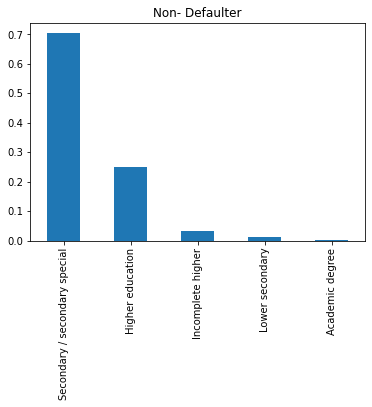

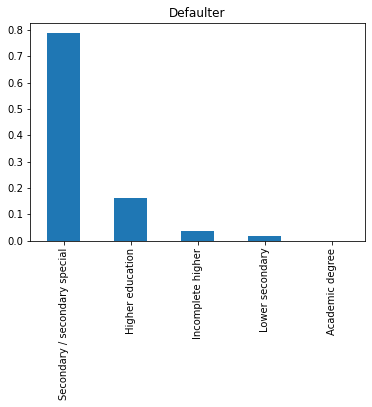

In [76]:
# categorial order for NAME_EDUCATION_TYPE 
# analysis for both Target 1 and target 0 for pie chart
#TARGERT 0
a = application_0.NAME_EDUCATION_TYPE.value_counts(normalize= True).plot.bar()
plt.title("Non- Defaulter")
plt.show()

# TARGET 1
b =application_1.NAME_EDUCATION_TYPE.value_counts(normalize= True).plot.bar()
plt.title("Defaulter")
plt.show()

**Observation : Here we can see that Academic degree people are applying loan in min number for both target 0 and 1 whereas secondary/ secondary special educated people are applying loans high in number.**

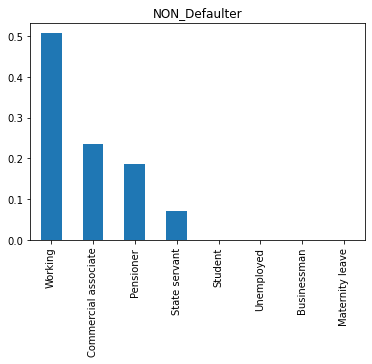

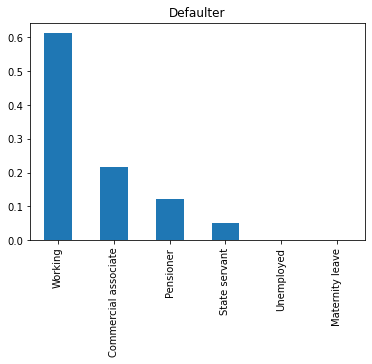

In [77]:
# categorial order for NAME_INCOME_TYPE 
# analysis for both Target 1 and target 0 for bar chart
#TARGERT 0
a = application_0.NAME_INCOME_TYPE.value_counts(normalize= True).plot.bar()
plt.title("NON_Defaulter")
plt.show()

# TARGET 1
b =application_1.NAME_INCOME_TYPE.value_counts(normalize= True).plot.bar()
plt.title("Defaulter")
plt.show()

**Observation : Here we can see that th student, business man are non default  whereas for bank  there is good income from working people**

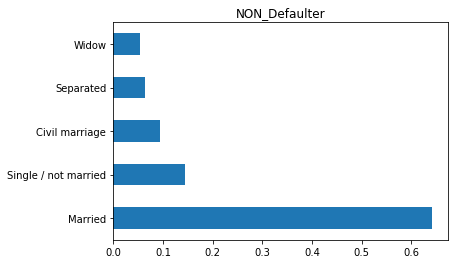

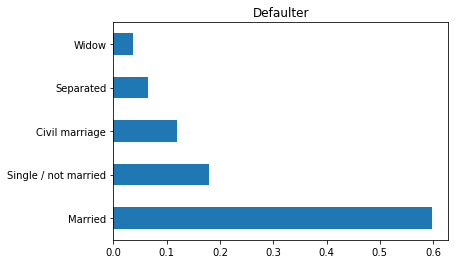

In [78]:
# categorial order for NAME_FAMILY_STATUS 
# analysis for both Target 1 and target 0 for pie chart
#TARGERT 0
a = application_0.NAME_FAMILY_STATUS.value_counts(normalize= True).plot.barh()
plt.title("NON_Defaulter")
plt.show()

# TARGET 1
b =application_1.NAME_FAMILY_STATUS.value_counts(normalize= True).plot.barh()
plt.title("Defaulter")
plt.show()

**Observation : Here we can see that the married people apply for loans mostly as its not affecting defaulter and non- defaulter **

In [79]:
# we can defin ea function which will call diff columns with diff graph for analysis
def data(var):
    plt.figure(figsize=(20,6))
    plt.style.use("bmh")
    plt.subplot(1,2,1)
    plt.title('Distribution of '+ '%s' %var +' for application_0', fontsize=10)
    plt.xlabel(var , fontsize=15)
    plt.ylabel('Non-Defaulters')
    plt.xticks(rotation=90)
    sns.countplot(var, data=application_0)
        
    plt.subplot(1,2,2)
    plt.title('Distribution of '+ '%s'%var +' for application_1', fontsize=9)
    plt.xlabel(var , fontsize=15)
    plt.ylabel(' Defaulters')
    plt.xticks(rotation=90)
    sns.countplot(var, data=application_1)
    plt.show()  

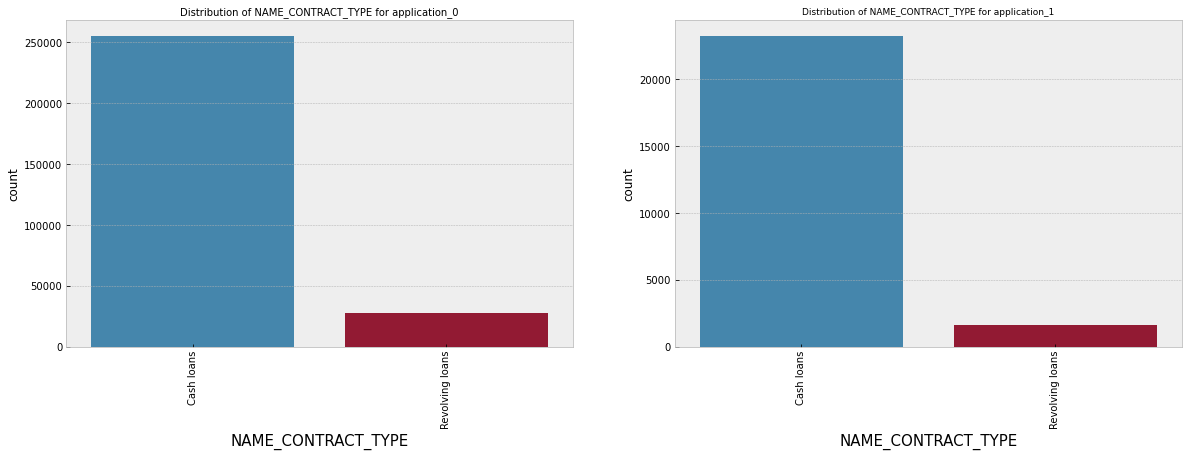

In [80]:
# NAME_CONTRACT_TYPE 
data('NAME_CONTRACT_TYPE')
plt.show()

**Here we can see that Revolving loans is more in non defaulter whereas less in defaulter** 

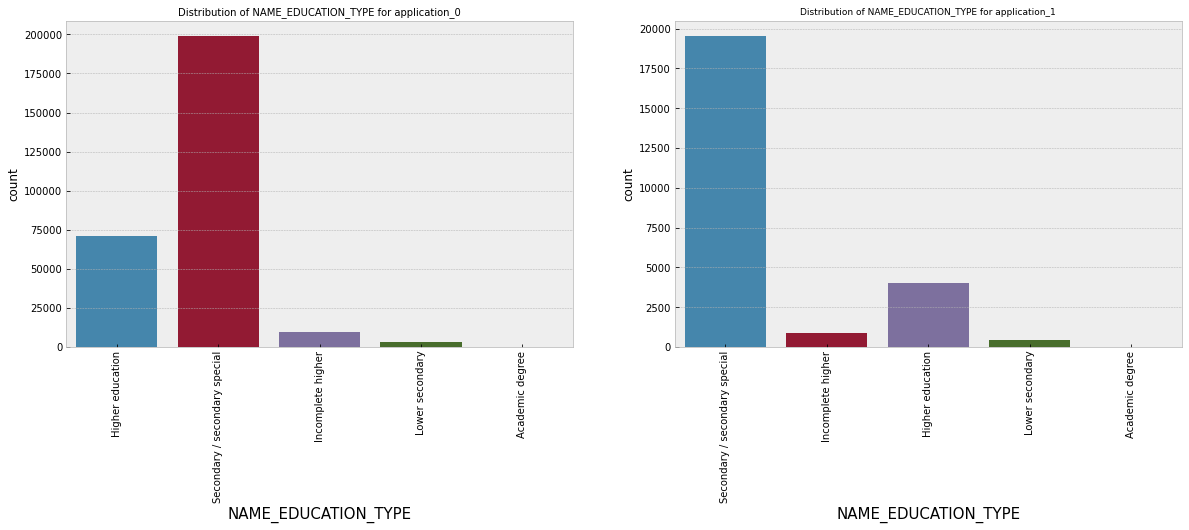

In [81]:
#  NAME_EDUCATION_TYPE 
data('NAME_EDUCATION_TYPE')
plt.show()

**Observation :here we can see that the higher the education the  more the individual is capable of paying the loan**

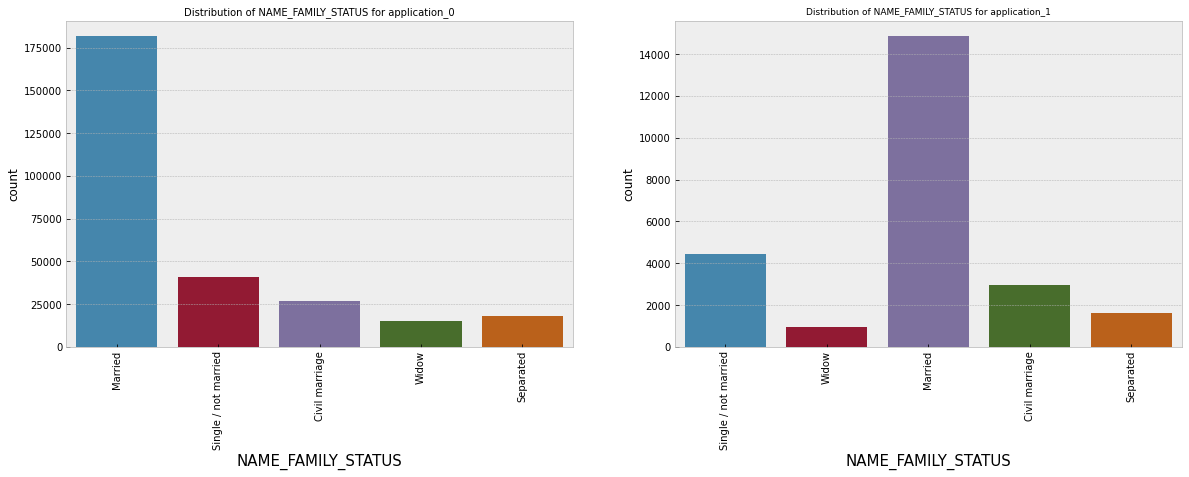

In [82]:
# NAME_CONTRACT_TYPE 
data('NAME_FAMILY_STATUS')
plt.show()

**Observation :here we can see that the hmarried people more likely take more loans compared with other**

### for numerical variables


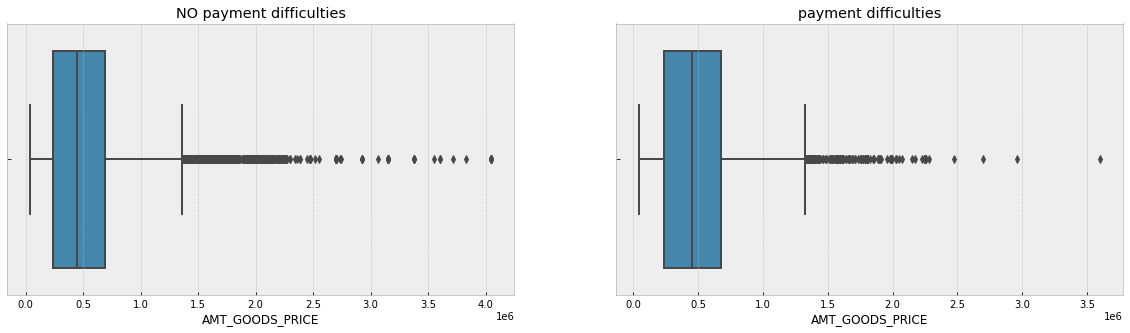

In [83]:
plt.figure(figsize=(20,5)) 
plt.subplot(1,2,1)
ax = sns.boxplot(application_0['AMT_GOODS_PRICE'])
plt.title('NO payment difficulties')

plt.subplot(1,2,2)
ax = sns.boxplot(application_1['AMT_GOODS_PRICE'])
plt.title('payment difficulties')
plt.show()

**Here we can see that also both are having the mid value about 0.5 and customer with no payment difficulty lies between 0.3 to 0.7**

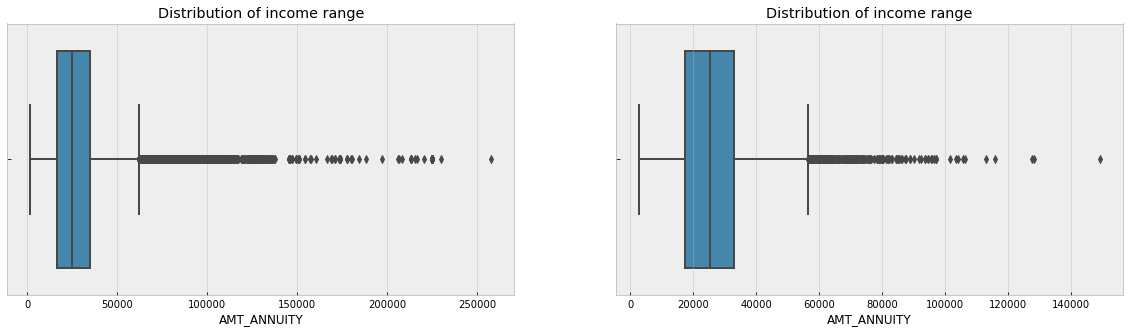

In [84]:
plt.figure(figsize=(20,5)) 
plt.subplot(1,2,1)
ax = sns.boxplot(application_0['AMT_ANNUITY'])
plt.title('Distribution of income range')

plt.subplot(1,2,2)
ax = sns.boxplot(application_1['AMT_ANNUITY'])
plt.title('Distribution of income range')
plt.show()

### Bivariate Analysis
##### Numerical Analysis

In [85]:
def number(a,b):
    plt.style.use('ggplot')
    fig=plt.figure(figsize=(20,7))
    
    sns.scatterplot(x=a,y=b,data= application_0, label= "Non-Defaulters", color='blue' )
    sns.scatterplot(x=a,y=b,data= application_1, label= "Defaulters", color='green' )
    plt.title(f'{a} vs {b}',fontsize=20)
    plt.show()

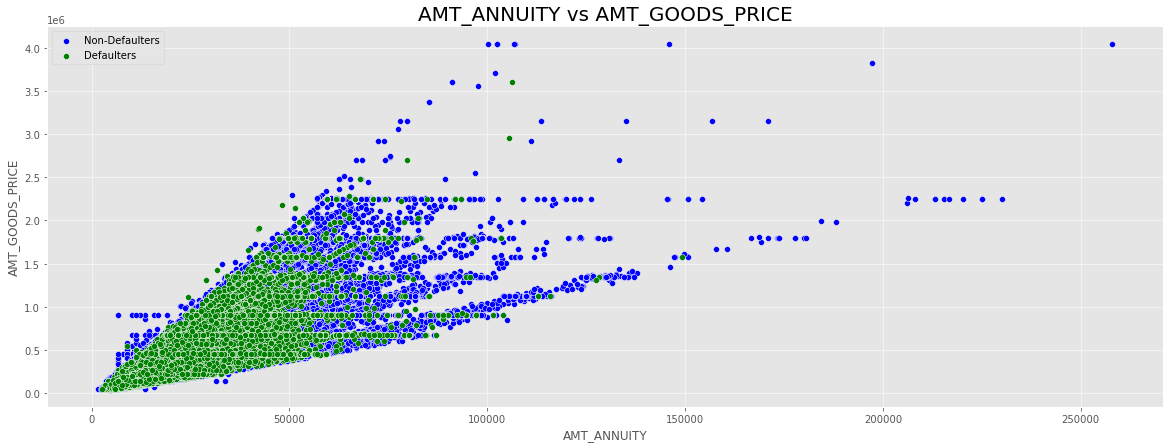

In [86]:
number ('AMT_ANNUITY','AMT_GOODS_PRICE')

**Observation: here  we can see that the corelation between AMT_ANNUITY,AMT_GOODS_PRICE- values above 70000 are tend to decrease in defaulters. Also we can see that graph  moderates but they are not thoroughly correlated because there are above par values for both the columns.**

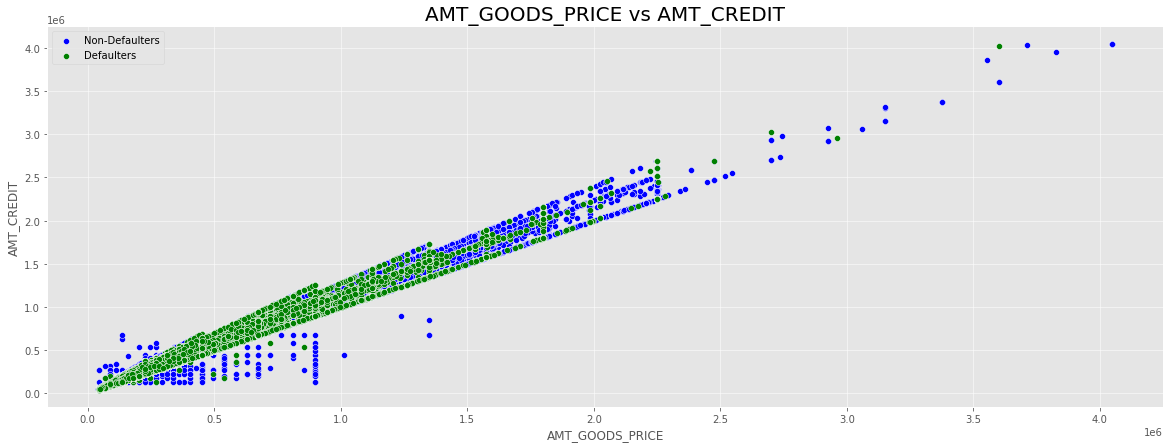

In [87]:
number ('AMT_GOODS_PRICE','AMT_CREDIT')

**Observation: the graph shows the Low, Median, high values of defaulters  and non defaulter the higher credit value is for those who pay on time and is non defaulter**

### Correlation

##### Finding correlation for numerical column for both cases of target column



In [88]:
## Finding some correlation for numerical columns for both target 0 and 1 
a =application_0.iloc[0:,2:]
b =application_1.iloc[0:,2:]

application_0=a.corr(method='pearson')
application_1=b.corr(method='pearson')

In [89]:
application_0.head(5)

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,0.027397,0.003081,0.020905,-0.000525,NaN,0.336966,-0.243356,0.185792,-0.028751,0.001080,0.244274,0.055453,-0.001201,-0.029929,0.023460,0.878571,0.022842,0.021866,-0.005244,-0.012342,0.010857,0.017326,0.021587,0.072193,0.070988,-0.015455,-0.041729,0.007298,-0.008307,0.006545,-0.008199,0.006783,-0.008063,-0.006972,0.014471,-0.002246,0.014137,-0.002172,-0.008501,0.003736,0.055718,-0.003833,-0.016239,-0.158963,-0.001442,0.053919,-0.002358,-0.002859,-0.005059,0.000322,0.004340,-0.005455,0.003710,0.011775,0.001160,0.004181,0.001078,0.001302,-0.002983,-0.000432,0.000648,-0.001632,-0.010455,-0.007087,-0.042547
AMT_INCOME_TOTAL,0.027397,1.000000,0.342799,0.418953,0.349462,NaN,0.062609,-0.141250,0.064937,0.022896,0.000733,0.140744,-0.032404,-0.018814,0.002683,0.083705,0.034256,-0.186573,-0.200466,0.076743,0.068510,0.137174,0.127701,0.010567,0.017618,0.020684,0.139598,-0.072401,0.016485,0.181891,0.015393,0.174416,0.016431,0.180458,0.125714,-0.027828,-0.027621,-0.027690,-0.027593,-0.041338,-0.002857,-0.039251,0.001160,0.004161,-0.100271,0.009035,0.159350,0.040088,0.000637,0.005402,0.005680,0.049421,0.045590,0.023814,0.015800,0.005141,0.008214,0.005762,0.000840,-0.000869,0.001417,0.007862,0.006234,0.061470,0.013128,0.029536
AMT_CREDIT,0.003081,0.342799,1.000000,0.771309,0.987250,NaN,-0.047378,-0.072515,0.013477,-0.001464,0.001498,0.071257,-0.017119,0.023096,0.026725,0.017074,0.064536,-0.103337,-0.112238,0.053619,0.024617,0.053735,0.054250,-0.025036,-0.015703,0.002506,0.129140,0.036085,0.005943,0.102921,0.004842,0.100024,0.005480,0.102374,0.072281,-0.000914,-0.019851,-0.000892,-0.022225,-0.069540,0.005490,0.100334,0.000567,-0.011750,-0.050260,-0.003613,0.084524,0.022297,-0.003243,0.028341,0.003956,0.053726,0.047987,0.032411,0.062477,0.012188,0.035527,0.021560,0.032151,-0.015602,-0.003734,0.004409,-0.001883,0.054071,0.017767,-0.048866
AMT_ANNUITY,0.020905,0.418953,0.771309,1.000000,0.776686,NaN,0.012263,-0.106425,0.039436,0.014113,0.000161,0.105645,-0.022467,0.021397,0.012231,0.071270,0.075787,-0.132128,-0.145153,0.053589,0.041992,0.080665,0.075487,-0.005675,0.001520,0.010582,0.126615,0.028051,0.014059,0.130944,0.013588,0.127014,0.013679,0.129959,0.090966,-0.013091,-0.022535,-0.012893,-0.023385,-0.062013,0.001265,0.103447,0.001108,-0.006122,-0.074962,-0.001508,0.131483,0.033962,-0.003493,-0.004040,0.000864,0.026064,0.037219,0.016277,0.007733,0.003527,-0.008344,0.004964,0.012736,-0.016527,0.003148,0.002392,0.012681,0.038181,0.011248,-0.010882
AMT_GOODS_PRICE,-0.000525,0.349462,0.987250,0.776686,1.000000,NaN,-0.044565,-0.071051,0.015916,-0.003649,0.001464,0.069769,0.005043,0.020185,0.042255,0.017249,0.062814,-0.104382,-0.112601,0.062766,0.026731,0.054922,0.054414,-0.024878,-0.016744,

In [90]:
application_1.head(5)

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,0.004796,-0.001675,0.031257,-0.008112,NaN,0.259109,-0.191942,0.149154,-0.032299,NaN,0.192469,0.051712,0.003592,-0.024306,0.013902,0.885484,0.040680,0.043185,-0.023899,-0.024322,-0.020793,-0.012073,-0.001174,0.046115,0.053515,-0.012260,-0.020268,0.004346,-0.020326,0.003981,-0.019678,0.004048,-0.019923,-0.016258,0.025804,0.001448,0.025180,-0.005106,0.011547,-0.007779,0.060561,NaN,-0.022138,-0.129482,-0.001895,0.028766,0.003591,NaN,-0.007550,NaN,0.001663,-0.002932,0.004800,-0.001079,-0.005500,0.004333,-0.001370,-0.002395,0.001136,-0.000382,-0.013004,-0.011792,-0.012583,-0.018174,-0.035427
AMT_INCOME_TOTAL,0.004796,1.000000,0.038131,0.046421,0.037583,NaN,0.003096,-0.014979,0.000158,-0.004215,NaN,0.014971,-0.012146,-0.000878,-0.004478,0.009889,0.006654,-0.021486,-0.022808,0.013775,0.007577,0.014531,0.013409,-0.002223,-0.003019,-0.001353,0.007154,-0.015110,0.001642,0.009801,0.001530,0.009299,0.001636,0.009652,0.006451,-0.004709,-0.005186,-0.004616,-0.004866,-0.002429,0.000168,0.001446,NaN,-0.001094,-0.011774,-0.000561,0.016119,0.004616,NaN,-0.000172,NaN,0.006271,0.003969,0.001871,0.001717,-0.000368,-0.002177,-0.000371,-0.000450,-0.000647,0.000656,-0.000272,0.000018,0.004114,-0.001133,0.001752
AMT_CREDIT,-0.001675,0.038131,1.000000,0.752195,0.983103,NaN,-0.135316,-0.000968,-0.025854,-0.052329,NaN,-0.000660,-0.059601,0.031771,0.008608,0.010157,0.051224,-0.059193,-0.071377,0.031782,0.019540,0.033260,0.033554,-0.033034,-0.037720,-0.016509,0.120848,0.077698,0.006840,0.090926,0.000958,0.088606,0.005950,0.090833,0.067370,0.019098,-0.025979,0.019487,-0.030880,-0.110851,0.034225,0.061629,NaN,-0.012192,-0.005333,-0.012227,0.056351,0.025318,NaN,0.037012,NaN,0.018148,0.063136,0.026399,0.046752,-0.000694,0.011174,0.013442,0.016949,-0.021964,-0.005981,0.003008,0.007650,0.055038,-0.017467,-0.035719
AMT_ANNUITY,0.031257,0.046421,0.752195,1.000000,0.752699,NaN,-0.014303,-0.082552,0.034279,-0.016767,NaN,0.081797,-0.049845,0.035656,-0.013768,0.078188,0.075711,-0.073784,-0.089291,0.031236,0.034807,0.066565,0.064109,-0.005745,0.001997,0.009902,0.116305,0.041415,0.001732,0.107146,-0.002979,0.104314,0.001626,0.105975,0.073045,0.004463,-0.022394,0.005500,-0.027495,-0.079870,0.018068,0.104865,NaN,-0.013983,-0.063666,-0.015767,0.117437,0.028638,NaN,0.001161,NaN,0.001187,0.028128,0.011742,-0.004823,-0.006037,-0.034168,-0.001563,-0.001466,-0.029489,0.014039,-0.000294,0.031242,0.053413,-0.010205,-0.013841
AMT_GOODS_PRICE,-0.008112,0.037583,0.983103,0.752699,1.000000,NaN,-0.135810,0.003587,-0.025679,-0.056086,NaN,-0.005270,-0.033617,0.028657,0.027678,0.013697,0.047388,-0.066390,-0.077191,0.044315,0.022392,0.036261,0.035484,-0.034115,-0.038916,-0.016685,0.131184,0.078754,0.006178,0.097623,0.000319,0.095

In [91]:
## dropping som ecolumns for clear visulaization as its not reequired for application_0
col_drop = ['FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE','FLAG_EMAIL',
          'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY', 'FLAG_EMAIL','DAYS_LAST_PHONE_CHANGE',
          'FLAG_DOCUMENT_2','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
          'LIVE_REGION_NOT_WORK_REGION','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4','FLAG_DOCUMENT_5',
          'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10',
          'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
          'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18',
          'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

application_1.drop(columns=col_drop,inplace=True)

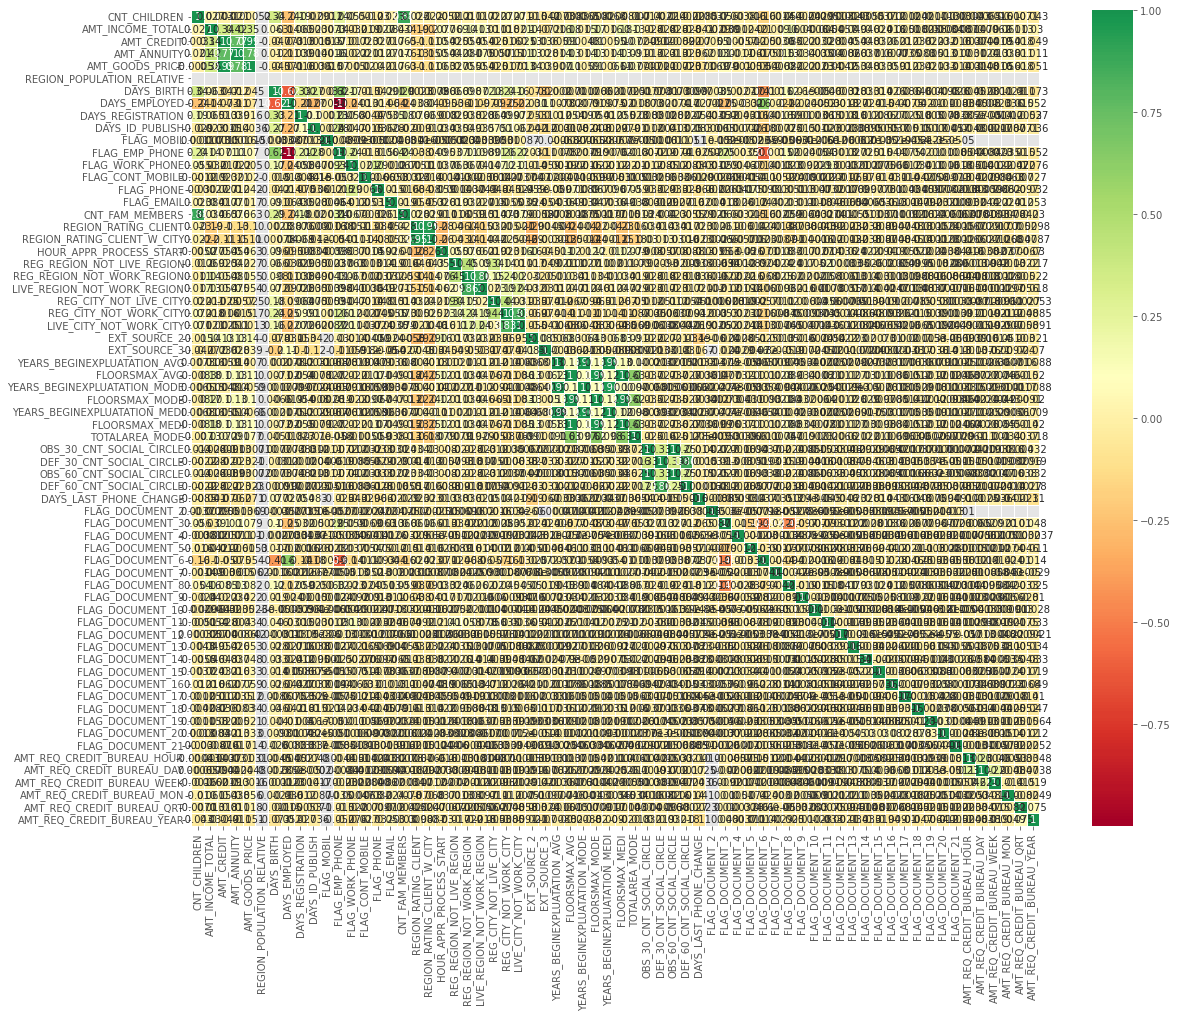

In [92]:
# for better vizualization of correlation plotting heatmap for application_0
fig = plt.figure(figsize=(19,15))
sns.heatmap(data=application_0 ,annot= True,linewidths=.5 , center=0.1,cmap='RdYlGn')
plt.show()

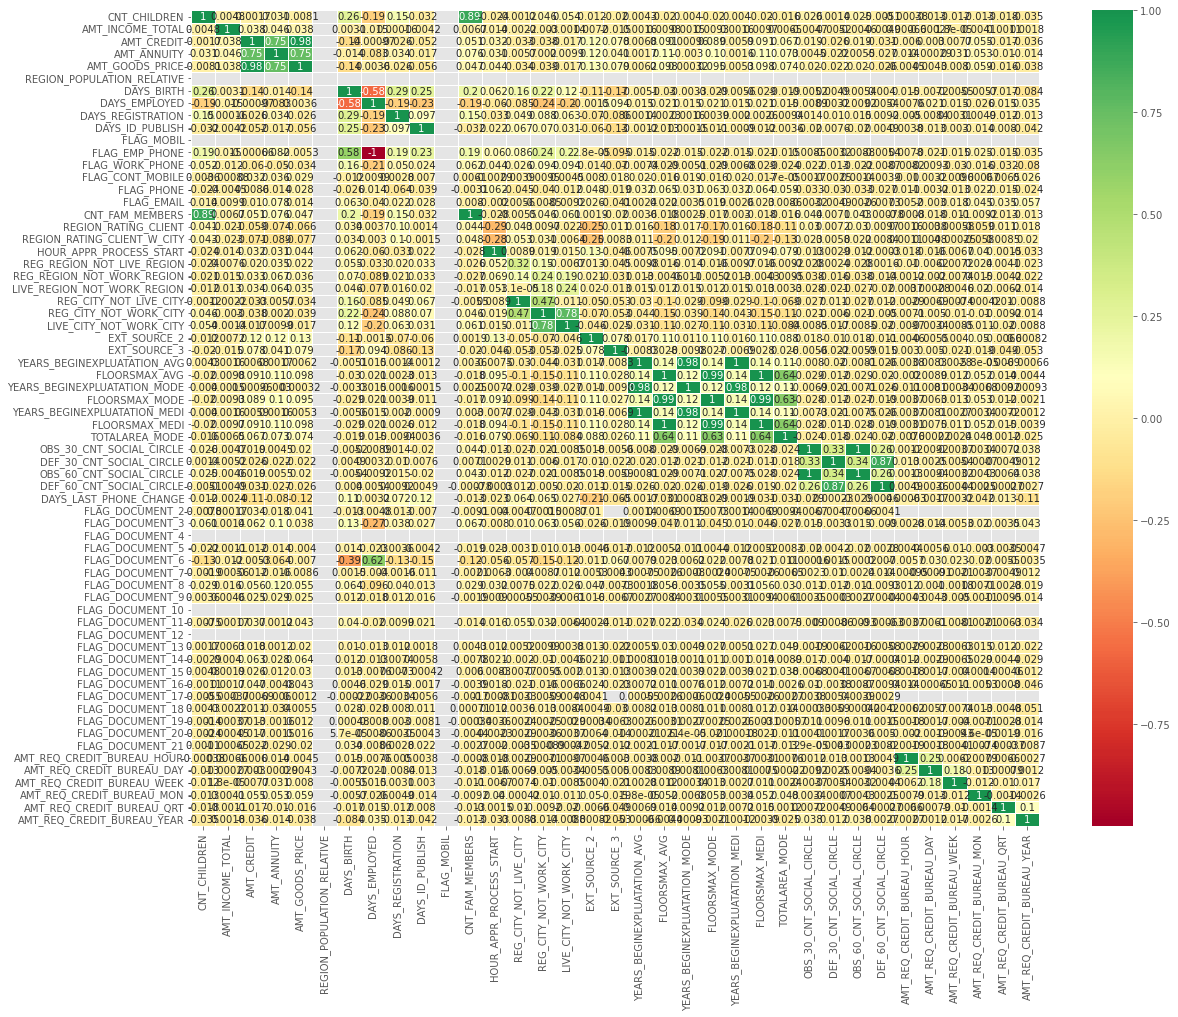

In [93]:
# for better vizualization of correlation plotting heatmap for application_0
fig = plt.figure(figsize=(19,15))
sns.heatmap(data=application_1 ,annot= True,linewidths=.5 , center=0.1,cmap='RdYlGn')
plt.show()

In [94]:
#Finding correlation for numerical column for both cases of target column i.e, 1/0
application_0.corr().unstack().reset_index()


,level_0,level_1,0
0,CNT_CHILDREN,CNT_CHILDREN,1.000000
1,CNT_CHILDREN,AMT_INCOME_TOTAL,0.042584
2,CNT_CHILDREN,AMT_CREDIT,-0.017218
3,CNT_CHILDREN,AMT_ANNUITY,0.019336
4,CNT_CHILDREN,AMT_GOODS_PRICE,-0.020484
...,...,...,...
4351,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_DAY,-0.011802
4352,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_WEEK,0.035002
4353,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_MON,-0.023008
4354,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,0.149289


In [95]:
# Doing top 10 correlation in application_0
corr_0 = application_0.corr()
corr_df = corr_0.where(np.triu(np.ones(corr_0.shape), k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns = ['col 1', 'col 2', 'Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Corr_Abs'] = abs(corr_df['Correlation'])
corr_df['Correlation']=round(corr_df['Correlation'],2)
corr_df=corr_df.sort_values(by = "Corr_Abs", ascending =False, )
corr_df.head(10)

,col 1,col 2,Correlation,Corr_Abs
2477,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.0,0.999997
733,FLAG_EMP_PHONE,DAYS_EMPLOYED,-1.0,0.999994
2207,FLOORSMAX_MEDI,FLOORSMAX_AVG,1.0,0.999990
2140,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,1.0,0.999973
2209,FLOORSMAX_MEDI,FLOORSMAX_MODE,1.0,0.999895
2075,FLOORSMAX_MODE,FLOORSMAX_AVG,1.0,0.999842
266,AMT_GOODS_PRICE,AMT_CREDIT,1.0,0.999629
2008,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,1.0,0.999325
2142,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,1.0,0.999201
1205,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,1.0,0.998327


In [96]:
# Doing top 10 correlation in application_1
corr_1 = application_1.corr()
corr_df = corr_1.where(np.triu(np.ones(corr_1.shape), k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns = ['col 1', 'col 2', 'Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Corr_Abs'] = abs(corr_df['Correlation'])
corr_df['Correlation']=round(corr_df['Correlation'],2)
corr_df=corr_df.sort_values(by = "Corr_Abs", ascending =False, )
corr_df.head(10)

,col 1,col 2,Correlation,Corr_Abs
970,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00,0.999991
788,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,1.00,0.999988
824,FLOORSMAX_MEDI,FLOORSMAX_AVG,1.00,0.999985
826,FLOORSMAX_MEDI,FLOORSMAX_MODE,1.00,0.999917
754,FLOORSMAX_MODE,FLOORSMAX_AVG,1.00,0.999873
790,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,1.00,0.999581
718,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,1.00,0.999572
142,AMT_GOODS_PRICE,AMT_CREDIT,1.00,0.999377
385,CNT_FAM_MEMBERS,CNT_CHILDREN,0.99,0.989490
1006,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.99,0.988058


**Observation for Non-Defaulters Decision is taken by FLOORSMAX_MEDI,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MODE,TOTALAREA_MODE**

*Observation Defaulter Decision is taken by-OBS_60_CNT_SOCIAL_CIRCLE,YEARS_BEGINEXPLUATATION_MEDI YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MODE**

### Merging the Dataset

In [97]:
## Analysis on Previous application dataset
prev_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
prev_application.shape

(1670214, 37)

In [99]:
prev_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### Merging Dataset application and prev_application

In [100]:
merged = pd.merge(left=application  ,right=prev_application,how='inner',on='SK_ID_CURR',suffixes='_a')

In [103]:
merged.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,...,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPEa,AMT_ANNUITYa,AMT_APPLICATION,AMT_CREDITa,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEa,WEEKDAY_APPR_PROCESS_STARTa,HOUR_APPR_PROCESS_STARTa,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEa,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500,406597,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0,-9461,-637,-3648,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,...,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000,1293502,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0,-16765,-1188,-1186,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,...,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000,1293502,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0,-16765,-1188,-1186,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,...,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2636178,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,Y,1,0.000000,NaN,NaN,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000,1293502,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0,-16765,-1188,-1186,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,...,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2396755

In [238]:
# droping unwanted columns 
merged.drop(['SK_ID_CURR', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'], axis=1, inplace=True)

MemoryError: Unable to allocate 302. MiB for an array with shape (28, 1413701) and data type object

In [104]:
def uni(var):
    plt.figure(figsize=(20,6))
    plt.style.use("bmh")
    plt.subplot(1,2,1)
    plt.title('Distribution of '+ '%s' %var +' for merged', fontsize=10)
    plt.xlabel(var , fontsize=15)
    plt.ylabel('Non-Defaulters')
    plt.xticks(rotation=90)
    sns.countplot(var, data=merged)
    plt.show()

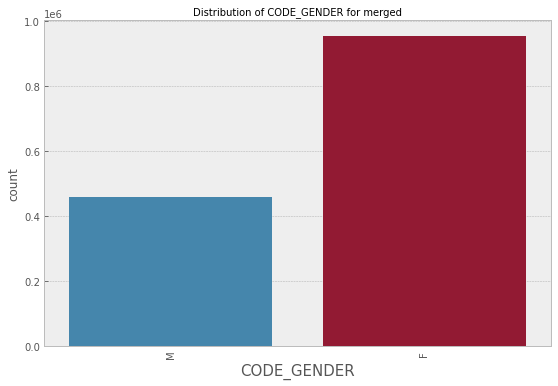

In [105]:
uni('CODE_GENDER')
plt.show()

**Observation: we can see that female have higher no of approval loans**

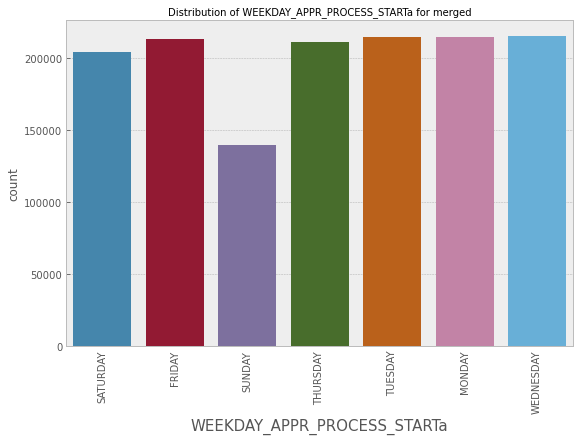

In [106]:
uni('WEEKDAY_APPR_PROCESS_STARTa')
plt.show()

**Observation: we can see that on sunday there are less of approval loans**

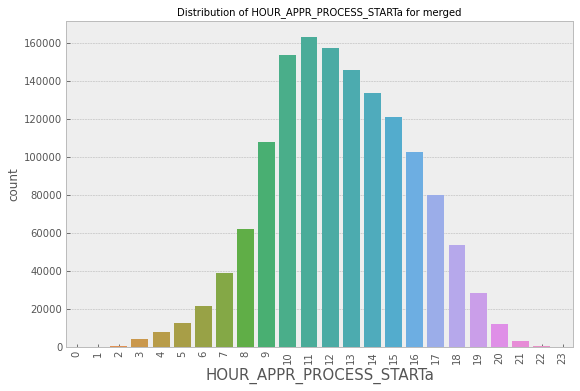

In [107]:
uni('HOUR_APPR_PROCESS_STARTa')
plt.show()

**Observation: the maximum hour to process the approval is 11 hour**

### INSIGHTS:-

<ol>
    <li>to minimize the risk of loss, varivales like- AMT_ANNUITY,DAYS_BIRTH,CODE_GENDER,NAME_HOUSING_TYPE,NAME_EDUCATION_TYPE  should be considerd</li>
    <li>The bank can add more weightage to car ownership while approving a loan amount as we saw that people who has car are less likely to be default </li>
    <li>Female are more likely to pay loans on time so banks should faocus more while approving loans</li> 
    <li>Banks should less focas on Working category as they have most number of uncessfull payments </li>
    <li>we can see that  that people who have House/Appartment, tend to apply for more loan and People living with parents tend to be default</li>
    
</ol>